In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]
from textwrap import wrap
from itertools import combinations

In [2]:
boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'd', 'markerfacecolor': "black", 'markeredgecolor': "black"}
}

In [3]:
growth_rate_diff_d = dict()
def _populate_growth_rate_diff_d(screen_name, g_r_d, g_r_d_d):
    clean_screen_name = screen_name.replace('\n', ' ')
    clean_screen_name = clean_screen_name.replace('growth rate (hr$^{-1}$)', "mutants")
    clean_screen_name = clean_screen_name.replace('Δ$\\it{pgi}$', "Δpgi")
    g_r_d_d[clean_screen_name] = dict()
    for strain, rep_growth_rates in g_r_d.items():
        clean_strain_name = strain.replace('\n', ' ')
        clean_strain_name = clean_strain_name.replace('$\\it{', '')
        clean_strain_name = clean_strain_name.replace('}$', '')
        g_r_d_d[clean_screen_name][clean_strain_name] = list()
        for pair in list(combinations(rep_growth_rates, 2)):
            g_r_d_d[clean_screen_name][clean_strain_name].append(abs(pair[1] - pair[0]))
            

growth_rate_d = {"strain 1": [1, 4, 10],"strain 2": [2, 4, 9]}
_populate_growth_rate_diff_d("test1", growth_rate_d, growth_rate_diff_d)
growth_rate_d = {"strain 1": [3,4,11]}
_populate_growth_rate_diff_d("test2", growth_rate_d, growth_rate_diff_d)
assert(set(growth_rate_diff_d["test1"]["strain 1"]) == set([3,6,9]))
assert(set(growth_rate_diff_d["test1"]["strain 2"]) == set([2,5,7]))
assert(set(growth_rate_diff_d["test2"]["strain 1"]) == set([1,7,8]))
growth_rate_diff_d = dict()

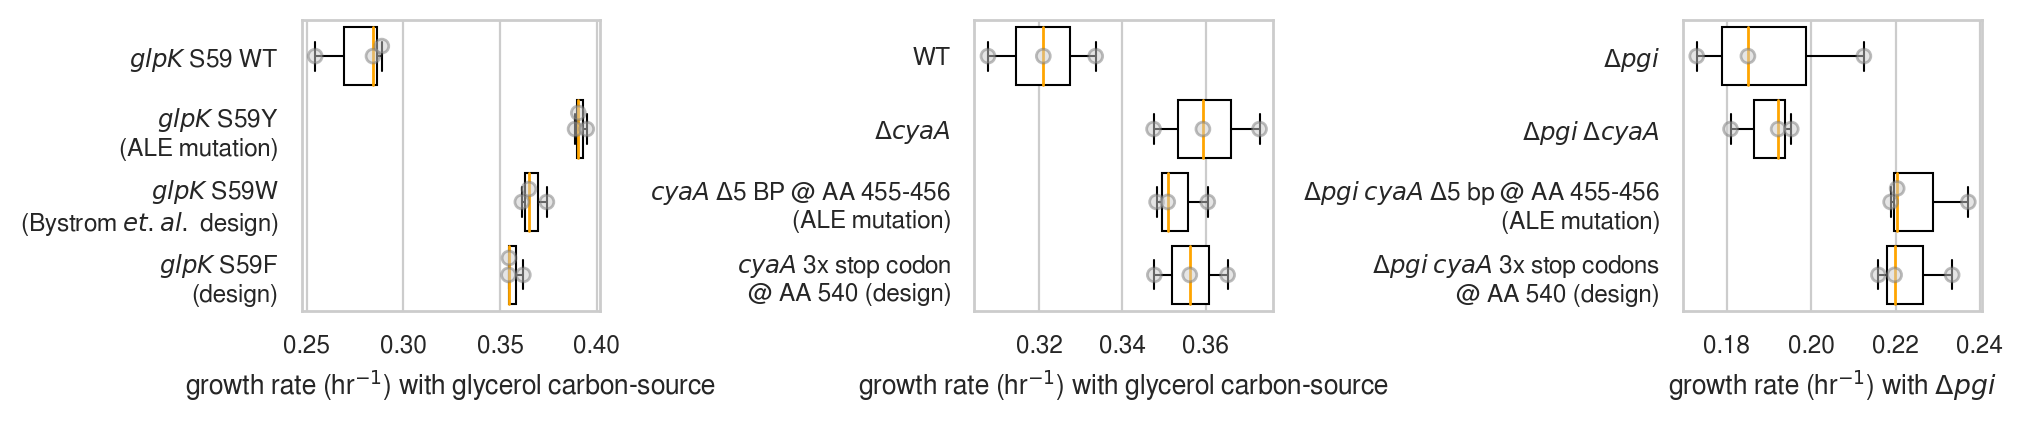

In [4]:
plt.rcParams['figure.constrained_layout.use'] = True  # for some reason, this adds enough horizontal space between plots
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10,2))

growth_rate_d = {
    "$\it{glpK}$ S59 WT": [0.2843521465, 0.2544827872, 0.2888920837],
    "$\it{glpK}$ S59Y\n(ALE mutation)": [0.388742, 0.390412, 0.394758],
    "$\it{glpK}$ S59W\n(Bystrom $\it{et. al.}$ design)": [0.3649051676, 0.3612638861, 0.3741623925],
    "$\it{glpK}$ S59F\n(design)": [0.3546362178, 0.36200296, 0.3543757514]
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[0], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[0], )
screen_name = "growth rate (hr$^{-1}$) with glycerol carbon-source"
axs[0].set_xlabel(screen_name)
screen_name = "glpK " + screen_name
_populate_growth_rate_diff_d(screen_name, growth_rate_d, growth_rate_diff_d)


growth_rate_d = {
    "WT": [0.333575814, 0.307703999, 0.320995885],
    "Δ$\it{cyaA}$": [0.3729286433, 0.3474839402, 0.3593327199],
    "$\it{cyaA}$ Δ5 BP @ AA 455-456\n(ALE mutation)" :[0.3508843077, 0.3605006902, 0.3482038948],
    "$\it{cyaA}$ 3x stop codon\n@ AA 540 (design)": [0.347666956, 0.3561745732, 0.3652640112]
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[1], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[1], )
screen_name = "growth rate (hr$^{-1}$) with glycerol carbon-source"
axs[1].set_xlabel(screen_name)
screen_name = " cyaA " + screen_name
_populate_growth_rate_diff_d(screen_name, growth_rate_d, growth_rate_diff_d)

growth_rate_d = {
    "Δ$\it{pgi}$": [0.172859, 0.184991, 0.212495],
    "Δ$\it{pgi}$ Δ$\it{cyaA}$": [0.192159, 0.180873, 0.195267],
    "Δ$\it{pgi}$ $\it{cyaA}$ Δ5 bp @ AA 455-456\n(ALE mutation)": [0.237267, 0.220393, 0.218842],
    "Δ$\it{pgi}$ $\it{cyaA}$ 3x stop codons\n@ AA 540 (design)": [0.215948, 0.219787, 0.23343],
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[2], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[2])
screen_name = "growth rate (hr$^{-1}$) with Δ$\it{pgi}$"
axs[2].set_xlabel(screen_name)
screen_name = "cyaA " + screen_name
_populate_growth_rate_diff_d(screen_name, growth_rate_d, growth_rate_diff_d)


plt.savefig('./figs/gdmuts_f6_g_h_i.svg')

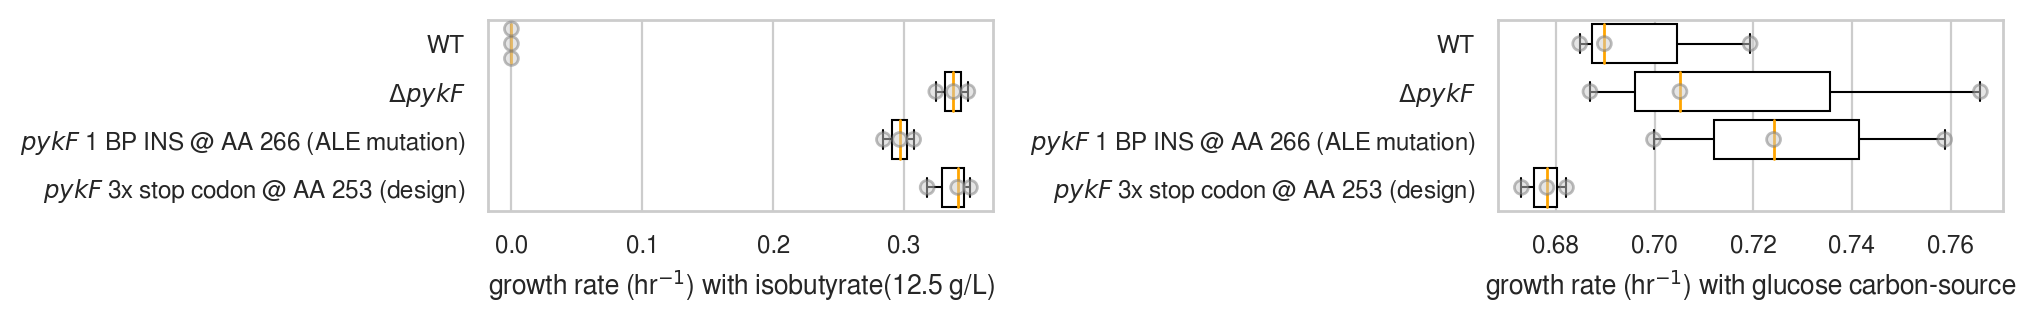

In [5]:
plt.rcParams['figure.constrained_layout.use'] = True  # for some reason, this adds enough horizontal space between plots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,1.5))


growth_rate_d = {
    "WT": [0, 0, 0],
    "Δ$\it{pykF}$": [0.3242, 0.348629, 0.337649],
    "$\it{pykF}$ 1 BP INS @ AA 266 (ALE mutation)": [0.296580463035264, 0.307229709278863, 0.28421420667125],
    "$\it{pykF}$ 3x stop codon @ AA 253 (design)" :[0.3176, 0.350594, 0.340874],
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[0], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[0])
screen_name = "growth rate (hr$^{-1}$) with isobutyrate(12.5 g/L)"
axs[0].set_xlabel(screen_name)
screen_name = "pykF " + screen_name
_populate_growth_rate_diff_d(screen_name, growth_rate_d, growth_rate_diff_d)


growth_rate_d = {
    "WT": [0.6848260127, 0.6898131542, 0.7193738142],
    "Δ$\it{pykF}$": [0.7660577044, 0.686898713, 0.7051382691],
    "$\it{pykF}$ 1 BP INS @ AA 266 (ALE mutation)" :[0.758803274, 0.699784, 0.724124848],
    "$\it{pykF}$ 3x stop codon @ AA 253 (design)" :[0.6781563677, 0.6729968019, 0.6821332428],
}
df = pd.DataFrame.from_dict(growth_rate_d, orient='index')
sns.boxplot( data=df.T, color="white", orient="h", ax=axs[1], **boxplot_kwargs  )
sns.swarmplot( data=df.T, orient="h", color="0.8", alpha=0.5, linewidth=1, ax=axs[1])
screen_name = "growth rate (hr$^{-1}$) with glucose carbon-source"
axs[1].set_xlabel(screen_name)
screen_name = "pykF " + screen_name
_populate_growth_rate_diff_d(screen_name, growth_rate_d, growth_rate_diff_d)

plt.savefig('./figs/gdmuts_f7_d_e.svg')

In [6]:
df = pd.DataFrame()
for screen_name, strain_rep_growth_diff_d in growth_rate_diff_d.items():
    for strain, rep_growth_diffs in strain_rep_growth_diff_d.items():
        for growth_diff in rep_growth_diffs:
            srs = pd.Series({"screen": screen_name, "strain": strain, "growth diff": growth_diff})
            df = df.append(srs, ignore_index=True)
display(df.head())

,growth diff,screen,strain
0,0.029869,glpK mutants with glycerol carbon-source,glpK S59 WT
1,0.004540,glpK mutants with glycerol carbon-source,glpK S59 WT
2,0.034409,glpK mutants with glycerol carbon-source,glpK S59 WT
3,0.001670,glpK mutants with glycerol carbon-source,glpK S59Y (ALE mutation)
4,0.006016,glpK mutants with glycerol carbon-source,glpK S59Y (ALE mutation)


/home/pphaneuf/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


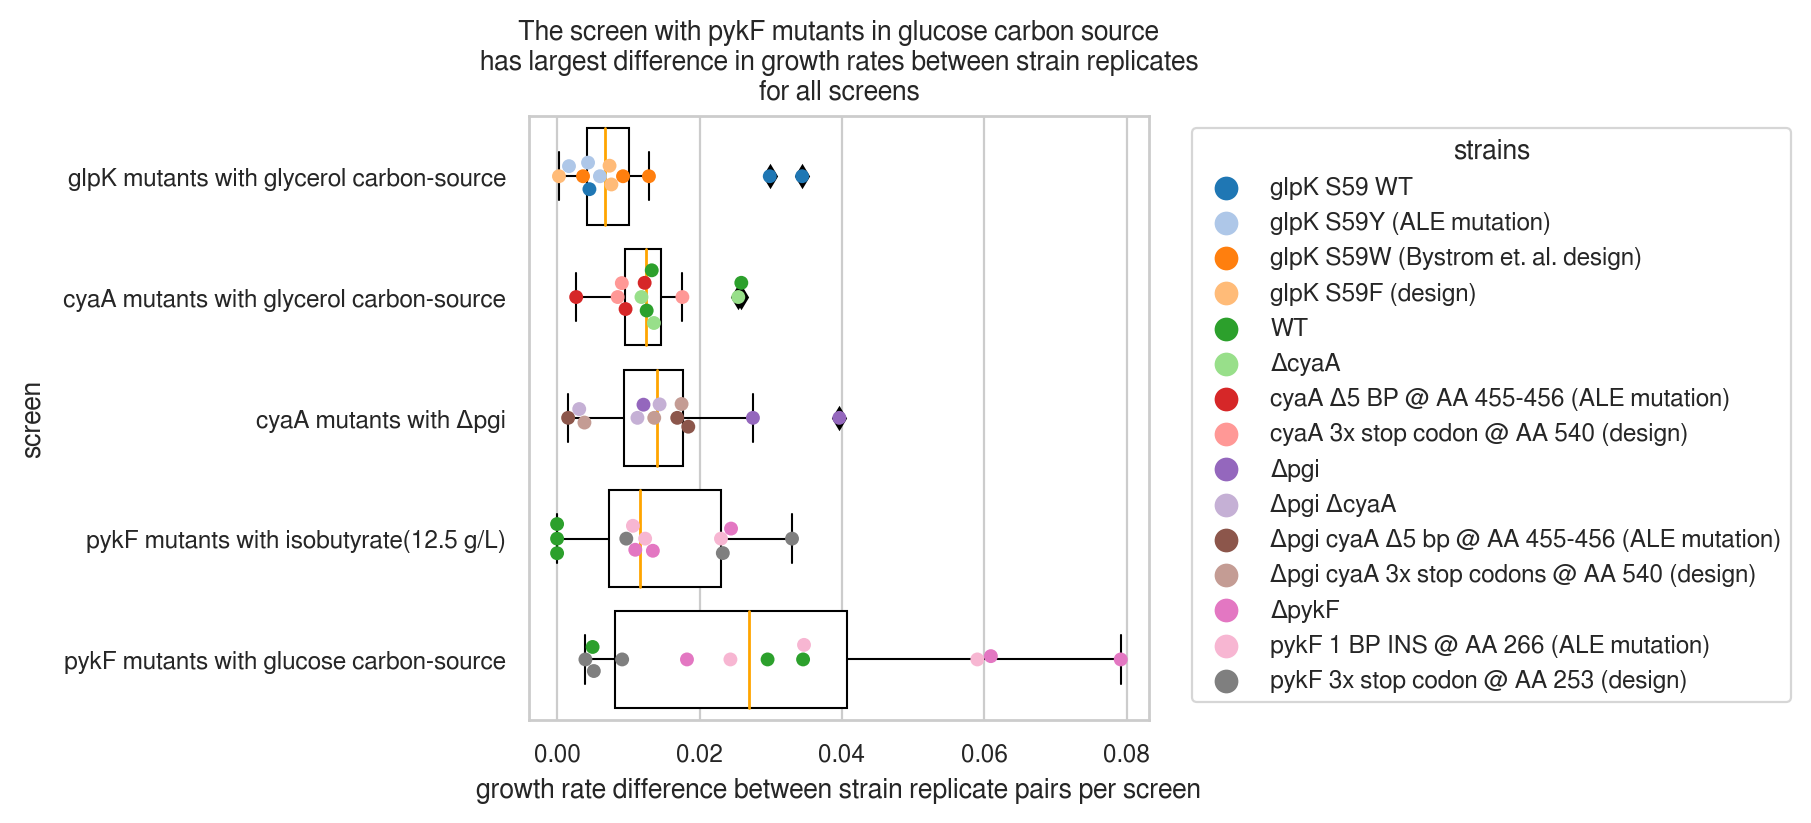

In [7]:
plt.figure(figsize=(4,4))
ax = sns.boxplot(
    data=df, orient="h",
    color="white",
    x="growth diff", y="screen",
    **boxplot_kwargs  
)

sns.swarmplot( data=df, orient="h", x="growth diff", y="screen", hue="strain",
              palette="tab20",
             )
ax.set_xlabel("growth rate difference between strain replicate pairs per screen")
ax.set_title("The screen with pykF mutants in glucose carbon source\nhas largest difference in growth rates between strain replicates\nfor all screens")
plt.legend(bbox_to_anchor=(1.05, 1), title='strains')